# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from  sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from  sklearn.model_selection import cross_validate

ModuleNotFoundError: No module named 'gensim'

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
resource_data = pd.read_csv('resources.csv')

In [5]:
print("Number of data points in train data", resource_data.shape)
print('-'*50)
print("The attributes of data :", resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
--------------------------------------------------
The attributes of data : ['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [6]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1


## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle..."


In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[0])
print(sent)
print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said,  Tell me and

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I recently read an article about giving students a choice about how they learn We already set goals why not let them choose where to sit and give them options of what to sit on I teach at a low income Title 1 school Every year I have a class with a range of abilities yet they are all the same age They learn differently and they have different interests Some have ADHD and some are fast learners Yet they are eager and active learners that want and need to be able to move around the room yet have a place that they can be comfortable to complete their work We need a classroom rug that we can use as a class for reading time and students can use during other learning times I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class Having these areas will provide these little ones with a way to wiggle while working Benjamin Franklin once said Tell me and I forget teach me 

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:31<00:00, 1581.82it/s]


In [18]:
# after preprocesing
preprocessed_essays[0]

'recently read article giving students choice learn already set goals not let choose sit give options sit teach low income title 1 school every year class range abilities yet age learn differently different interests adhd fast learners yet eager active learners want need able move around room yet place comfortable complete work need classroom rug use class reading time students use learning times also requested four kore kids wobble chairs four back jack padded portable chairs students still move whole group lessons without disrupting class areas provide little ones way wiggle working benjamin franklin said tell forget teach may remember involve learn want children involved learning choice sit learn giving options comfortable flexible seating'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# preprocessing of project title

In [20]:
sent = decontracted(project_data['project_title'].values[0])
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Flexible Seating for Flexible Learning


In [21]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 25304.29it/s]


## 1.5 Preparing data for models

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [22]:
#split the data into train ,test and cross validation

In [23]:
y =project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
print(project_data.shape)

(50000, 17)


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#Splitting data into Train and cross validation
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(project_data, y, test_size=0.33,stratify=y)
# split the train data set into cross validation train and cross validation test
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33,stratify=y_train)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(22445, 17)
(16500, 17)
(11055, 17)


In [27]:
print(y_train.shape)
print(y_test.shape)
print(y_cv.shape)

(22445,)
(16500,)
(11055,)


In [28]:
print(X_train['essay'].values[0])

I work with gifted and talented 6th grade students. These kids are exceptionally bright, funny, curious, and desperate to explore the world around them. They love to read and write and research topics that you cannot even imagine a student being interested in. Some of them watch Nat Geo, the Discovery Channel, and Smithsonian Channel just for fun.\r\n\r\nUnfortunately, these students have grown up in a low socio/economic area. Many of them live in single parent households. Their parents do not have money to give them access to worldly experiences or even books. Yet, they absolutely want to see the distant world and read as many books as humanly possible. Every day, I look at my students and think about the things they are missing and the world they want to experience. I want to give them that world. \r\nSince my children live in an area of poverty, they do not typically have access to technology. However, as gifted students, they crave and desire to explore the world around them. Havin

In [29]:
#preprocessing of train ,cross validation and test essay data  

In [30]:
#preprocess the X_train essay

In [31]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essay_train_data = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essay_train_data.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:17<00:00, 1275.75it/s]


In [32]:
#preprocess the X_cv essay

In [33]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essay_cv_data = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essay_cv_data.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:08<00:00, 1287.26it/s]


In [34]:
#preprocess the X_test essay

In [35]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essay_test_data = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essay_test_data.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:12<00:00, 1350.05it/s]


In [36]:
#preprocessing of x_train,x_cv and x_test of project title

In [37]:
# Combining all the above statemennts of x_train
from tqdm import tqdm
train_preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    train_preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 36091.71it/s]


In [38]:
# Combining all the above statemennts x_cv
from tqdm import tqdm
cv_preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    cv_preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 39697.94it/s]


In [39]:
# Combining all the above statemennts x_cv
from tqdm import tqdm
test_preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    test_preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 35666.73it/s]


### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [40]:
#vectorisation of clean categories

In [41]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)

train_categories_one_hot=vectorizer.transform(X_train['clean_categories'].values)
cv_categories_one_hot=vectorizer.transform(X_cv['clean_categories'].values)
test_categories_one_hot=vectorizer.transform(X_test['clean_categories'].values)

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_categories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_categories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of train matrix after one hot encodig  (22445, 9)
Shape of train matrix after one hot encodig  (11055, 9)
Shape of train matrix after one hot encodig  (16500, 9)


In [42]:
#vectorisation of clean subcategories

In [43]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)

train_subcategories_one_hot=vectorizer.transform(X_train['clean_subcategories'].values)
cv_subcategories_one_hot=vectorizer.transform(X_cv['clean_subcategories'].values)
test_subcategories_one_hot=vectorizer.transform(X_test['clean_subcategories'].values)

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_subcategories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_subcategories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_subcategories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of train matrix after one hot encodig  (22445, 30)
Shape of train matrix after one hot encodig  (11055, 30)
Shape of train matrix after one hot encodig  (16500, 30)


In [44]:
# Build the data matrix using these features-- school_state : categorical data (one hot encoding)
##Encoding for school state 

In [45]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_state = dict(my_counter)
sorted_cat_dict_state = dict(sorted(cat_dict_state.items(), key=lambda kv: kv[1]))


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict_state.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)

train_state_one_hot=vectorizer.transform(X_train['school_state'].values)
cv_state_one_hot=vectorizer.transform(X_cv['school_state'].values)
test_state_one_hot=vectorizer.transform(X_test['school_state'].values)

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_state_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_state_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'AK', 'DE', 'WV', 'ME', 'NM', 'HI', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'TN', 'CT', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of train matrix after one hot encodig  (22445, 51)
Shape of train matrix after one hot encodig  (11055, 51)
Shape of train matrix after one hot encodig  (16500, 51)


In [46]:
#Encoding for project_grade_category

In [47]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category']:
    my_counter.update(word.split())
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_grade = dict(my_counter)
sorted_cat_dict_grade = dict(sorted(cat_dict_grade.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict_grade)

# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict_grade.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)

train_grade_one_hot=vectorizer.transform(X_train['project_grade_category'].values)
cv_grade_one_hot=vectorizer.transform(X_cv['project_grade_category'].values)
test_grade_one_hot=vectorizer.transform(X_test['project_grade_category'].values)

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_grade_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_grade_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_grade_one_hot.shape)

{'9-12': 4966, '6-8': 7750, '3-5': 16968, 'PreK-2': 20316, 'Grades': 50000}
['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of train matrix after one hot encodig  (22445, 5)
Shape of train matrix after one hot encodig  (11055, 5)
Shape of train matrix after one hot encodig  (16500, 5)


In [48]:
#Encoding for teacher_prefix 

In [49]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna("")

In [50]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix']:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict_prefix = dict(my_counter)
sorted_cat_dict_prefix = dict(sorted(cat_dict_prefix.items(), key=lambda kv: kv[1]))


# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict_prefix.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))

train_teacher_prefix_one_hot=vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
cv_teacher_prefix_one_hot=vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
test_teacher_prefix_one_hot=vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",train_teacher_prefix_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_teacher_prefix_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_teacher_prefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of train matrix after one hot encodig  (22445, 5)
Shape of train matrix after one hot encodig  (11055, 5)
Shape of train matrix after one hot encodig  (16500, 5)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [51]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(preprocessed_essay_train_data)

text_bow_essays_train = vectorizer.transform(preprocessed_essay_train_data)
print("Shape of matrix after one hot encodig ",text_bow_essays_train.shape)

Shape of matrix after one hot encodig  (22445, 8868)


In [52]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
text_bow_essays_cv = vectorizer.transform(preprocessed_essay_cv_data)
print("Shape of matrix after one hot encodig ",text_bow_essays_cv.shape)

Shape of matrix after one hot encodig  (11055, 8868)


In [53]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
text_bow_essays_test= vectorizer.transform(preprocessed_essay_test_data)
print("Shape of matrix after one hot encodig ",text_bow_essays_test.shape)

Shape of matrix after one hot encodig  (16500, 8868)


# BOW on project_title

In [54]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [55]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer()
vectorizer.fit(train_preprocessed_project_title)

text_bow_title_train= vectorizer.transform(train_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_bow_title_train.shape)

Shape of matrix after one hot encodig  (22445, 8014)


In [56]:
text_bow_title_cv= vectorizer.transform(cv_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_bow_title_cv.shape)

Shape of matrix after one hot encodig  (11055, 8014)


In [57]:
text_bow_title_test= vectorizer.transform(test_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_bow_title_test.shape)

Shape of matrix after one hot encodig  (16500, 8014)


# TFIDF Vectorizer on project_title

In [58]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(train_preprocessed_project_title)

text_tfidf_title_train = vectorizer.transform(train_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_tfidf_title_train.shape)

Shape of matrix after one hot encodig  (22445, 8014)


In [59]:
# Similarly you can vectorize for title 
text_tfidf_title_cv = vectorizer.transform(cv_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_tfidf_title_cv.shape)

Shape of matrix after one hot encodig  (11055, 8014)


In [60]:
# Similarly you can vectorize for title also
text_tfidf_title_test = vectorizer.transform(test_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_tfidf_title_test.shape)

Shape of matrix after one hot encodig  (16500, 8014)


# TFIDF Vectorizer on preprocessed essay

In [61]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(preprocessed_essay_train_data)

text_tfidf_essay_train = vectorizer.transform(preprocessed_essay_train_data)
print("Shape of matrix after one hot encodig ",text_tfidf_essay_train.shape)

Shape of matrix after one hot encodig  (22445, 8868)


In [62]:
# Similarly you can vectorize for title also
text_tfidf_essay_cv = vectorizer.transform(preprocessed_essay_cv_data)
print("Shape of matrix after one hot encodig ",text_tfidf_essay_cv.shape)

Shape of matrix after one hot encodig  (11055, 8868)


In [63]:
text_tfidf_essay_test = vectorizer.transform(preprocessed_essay_test_data)
print("Shape of matrix after one hot encodig ",text_tfidf_essay_test.shape)

Shape of matrix after one hot encodig  (16500, 8868)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [64]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [65]:
import pickle

In [66]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [67]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essay_train_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_train_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_train_data.append(vector)

print(len(avg_w2v_essay_train_data))
print(len(avg_w2v_essay_train_data[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:13<00:00, 1676.75it/s]


22445
300


In [68]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essay_cv_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_cv_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_cv_data.append(vector)

print(len(avg_w2v_essay_cv_data))
print(len(avg_w2v_essay_cv_data[0]))

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:06<00:00, 1657.57it/s]


11055
300


In [69]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essay_test_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_test_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_test_data.append(vector)

print(len(avg_w2v_essay_test_data))
print(len(avg_w2v_essay_test_data[0]))

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:08<00:00, 1860.05it/s]


16500
300


In [70]:
#Using Pretrained Models: Avg W2V for project title

In [71]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_project_title_train_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_project_title_train_data.append(vector)

print(len(avg_w2v_project_title_train_data))
print(len(avg_w2v_project_title_train_data[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 33677.18it/s]


22445
300


In [72]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_project_title_cv_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_project_title_cv_data.append(vector)

print(len(avg_w2v_project_title_cv_data))
print(len(avg_w2v_project_title_cv_data[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 26056.19it/s]


11055
300


In [73]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_project_title_test_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_project_title_test_data.append(vector)

print(len(avg_w2v_project_title_test_data))
print(len(avg_w2v_project_title_test_data[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 34251.84it/s]


16500
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [74]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essay_train_data)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [75]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_train_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_train_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_train_data.append(vector)

print(len(tfidf_w2v_essay_train_data))
print(len(tfidf_w2v_essay_train_data[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:58<00:00, 189.13it/s]


22445
300


In [76]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_cv_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_cv_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_cv_data.append(vector)

print(len(tfidf_w2v_essay_cv_data))
print(len(tfidf_w2v_essay_cv_data[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:58<00:00, 188.33it/s]


11055
300


In [77]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_test_data = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay_test_data): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_test_data.append(vector)

print(len(tfidf_w2v_essay_test_data))
print(len(tfidf_w2v_essay_test_data[0]))

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:26<00:00, 191.03it/s]


16500
300


# Using Pretrained Models: TFIDF weighted W2V on project_title


In [78]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(train_preprocessed_project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [79]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_project_title.append(vector)

print(len(tfidf_w2v_train_project_title))
print(len(tfidf_w2v_train_project_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:01<00:00, 14494.49it/s]


22445
300


In [80]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_cv_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_cv_project_title.append(vector)

print(len(tfidf_w2v_cv_project_title))
print(len(tfidf_w2v_cv_project_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 14696.25it/s]


11055
300


In [81]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_project_title.append(vector)

print(len(tfidf_w2v_test_project_title))
print(len(tfidf_w2v_test_project_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:01<00:00, 15144.01it/s]


16500
300


In [82]:
print(X_train.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay'],
      dtype='object')


In [83]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [84]:
x_train = pd.merge(X_train, price_data, on = "id", how = "left")
x_test = pd.merge(X_test, price_data, on = "id", how = "left")
x_cv = pd.merge(X_cv, price_data, on = "id", how = "left")

In [85]:
print(x_train.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity'],
      dtype='object')


In [86]:
print(x_train.shape)

(22445, 19)


### 1.5.3 Vectorizing Numerical features

In [87]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

features_scalar = StandardScaler()

features_scalar.fit(x_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {features_scalar.mean_[0]}, Standard deviation : {np.sqrt(features_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_price_standar = features_scalar.transform(x_train['price'].values.reshape(-1, 1))
print(train_price_standar.shape)

Mean : 301.6061848964134, Standard deviation : 390.7270582909109
(22445, 1)


In [88]:
cv_price_standar = features_scalar.transform(x_cv['price'].values.reshape(-1, 1))
print(cv_price_standar.shape)

(11055, 1)


In [89]:
test_price_standar = features_scalar.transform(x_test['price'].values.reshape(-1, 1))
print(test_price_standar.shape)

(16500, 1)


# Vectorizing Numerical features quantity

In [90]:
from sklearn.preprocessing import StandardScaler
features_scalar = StandardScaler()

features_scalar.fit(x_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {features_scalar.mean_[0]}, Standard deviation : {np.sqrt(features_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_quantity_standar = features_scalar.transform(x_train['quantity'].values.reshape(-1, 1))
print(train_price_standar.shape)

C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Mean : 17.144798396079306, Standard deviation : 27.497995961902703


C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(22445, 1)


In [91]:
cv_quantity_standar = features_scalar.transform(x_cv['quantity'].values.reshape(-1, 1))
print(cv_quantity_standar.shape)

C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(11055, 1)


In [92]:
test_quantity_standar = features_scalar.transform(x_test['quantity'].values.reshape(-1, 1))
print(test_quantity_standar.shape)

C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(16500, 1)


In [93]:
#teacher_number_of_previously_posted_projects

In [94]:
from sklearn.preprocessing import StandardScaler
features_scalar = StandardScaler()

features_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {features_scalar.mean_[0]}, Standard deviation : {np.sqrt(features_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_train= features_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(teacher_number_of_previously_posted_projects_train.shape)

C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Mean : 11.227801292047227, Standard deviation : 27.673235919879147


C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(22445, 1)


In [95]:
teacher_number_of_previously_posted_projects_cv = features_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(teacher_number_of_previously_posted_projects_cv.shape)

C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(11055, 1)


In [96]:
teacher_number_of_previously_posted_projects_test = features_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(teacher_number_of_previously_posted_projects_test.shape)

C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(16500, 1)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [97]:
# combine all the numerical  data together 

In [98]:
#categrical data --category
print("Shape of train matrix after one hot encodig ",train_categories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_categories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_categories_one_hot.shape)

Shape of train matrix after one hot encodig  (22445, 9)
Shape of train matrix after one hot encodig  (11055, 9)
Shape of train matrix after one hot encodig  (16500, 9)


In [99]:
#categrical data --subcategory
print("Shape of train matrix after one hot encodig ",train_subcategories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_subcategories_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_subcategories_one_hot.shape)

Shape of train matrix after one hot encodig  (22445, 30)
Shape of train matrix after one hot encodig  (11055, 30)
Shape of train matrix after one hot encodig  (16500, 30)


In [100]:
#category --state
print("Shape of train matrix after one hot encodig ",train_state_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_state_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_state_one_hot.shape)

Shape of train matrix after one hot encodig  (22445, 51)
Shape of train matrix after one hot encodig  (11055, 51)
Shape of train matrix after one hot encodig  (16500, 51)


In [101]:
#category ----grade
print("Shape of train matrix after one hot encodig ",train_grade_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_grade_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_grade_one_hot.shape)

Shape of train matrix after one hot encodig  (22445, 5)
Shape of train matrix after one hot encodig  (11055, 5)
Shape of train matrix after one hot encodig  (16500, 5)


In [102]:
#category ----teacher
print("Shape of train matrix after one hot encodig ",train_teacher_prefix_one_hot.shape)
print("Shape of train matrix after one hot encodig ",cv_teacher_prefix_one_hot.shape)
print("Shape of train matrix after one hot encodig ",test_teacher_prefix_one_hot.shape)

Shape of train matrix after one hot encodig  (22445, 5)
Shape of train matrix after one hot encodig  (11055, 5)
Shape of train matrix after one hot encodig  (16500, 5)


In [103]:
#bow essay
print("Shape of matrix after one hot encodig ",text_bow_essays_train.shape)
print("Shape of matrix after one hot encodig ",text_bow_essays_cv.shape)
print("Shape of matrix after one hot encodig ",text_bow_essays_test.shape)

#bow project title
print("Shape of matrix after one hot encodig ",text_bow_title_train.shape)
print("Shape of matrix after one hot encodig ",text_bow_title_cv.shape)
print("Shape of matrix after one hot encodig ",text_bow_title_test.shape)

Shape of matrix after one hot encodig  (22445, 8868)
Shape of matrix after one hot encodig  (11055, 8868)
Shape of matrix after one hot encodig  (16500, 8868)
Shape of matrix after one hot encodig  (22445, 8014)
Shape of matrix after one hot encodig  (11055, 8014)
Shape of matrix after one hot encodig  (16500, 8014)


In [104]:
#bow essay  tfidf
print("Shape of matrix after one hot encodig ",text_tfidf_essay_train.shape)
print("Shape of matrix after one hot encodig ",text_tfidf_essay_cv.shape)
print("Shape of matrix after one hot encodig ",text_tfidf_essay_test.shape)

#bow project title
print("Shape of matrix after one hot encodig ",text_tfidf_title_train.shape)
print("Shape of matrix after one hot encodig ",text_tfidf_title_cv.shape)
print("Shape of matrix after one hot encodig ",text_tfidf_title_test.shape)

Shape of matrix after one hot encodig  (22445, 8868)
Shape of matrix after one hot encodig  (11055, 8868)
Shape of matrix after one hot encodig  (16500, 8868)
Shape of matrix after one hot encodig  (22445, 8014)
Shape of matrix after one hot encodig  (11055, 8014)
Shape of matrix after one hot encodig  (16500, 8014)


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

# Normalizing the numerical features: Price

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [105]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train1=hstack(((train_categories_one_hot,train_subcategories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_prefix_one_hot,text_bow_essays_train,text_bow_title_train,train_price_standar,
                  train_quantity_standar,teacher_number_of_previously_posted_projects_train))).tocsr()
X_train1.shape

(22445, 16985)

In [106]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_cv1=hstack(((cv_categories_one_hot,cv_subcategories_one_hot,cv_state_one_hot,cv_grade_one_hot,
              cv_teacher_prefix_one_hot,text_bow_essays_cv,text_bow_title_cv,cv_price_standar,
                  cv_quantity_standar,teacher_number_of_previously_posted_projects_cv))).tocsr()
X_cv1.shape

(11055, 16985)

In [107]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_test1=hstack(((test_categories_one_hot,test_subcategories_one_hot,test_state_one_hot,test_grade_one_hot,
                 test_teacher_prefix_one_hot,text_bow_essays_test,text_bow_title_test,
                 test_price_standar,test_quantity_standar,teacher_number_of_previously_posted_projects_test
                ))).tocsr()
X_test1.shape

(16500, 16985)

In [108]:
print(X_train1.shape,y_train.shape)
print(X_cv1.shape,y_cv.shape)
print(X_test1.shape,y_test.shape)

(22445, 16985) (22445,)
(11055, 16985) (11055,)
(16500, 16985) (16500,)


In [109]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

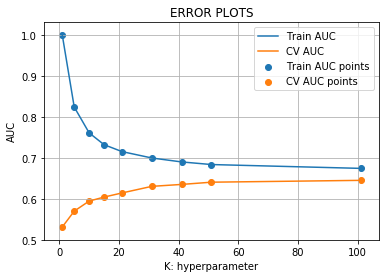

In [110]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
    neigh.fit(X_train1, y_train)

    y_train_pred = batch_predict(neigh,X_train1)    
    y_cv_pred = batch_predict(neigh,X_cv1)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [111]:
#here we are choosing the best_k based on forloop results
best_k = 81

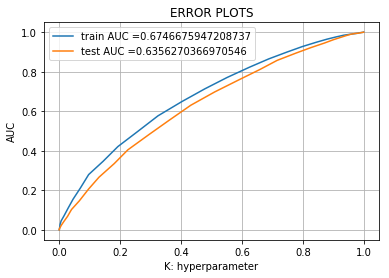

In [112]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train1)    
y_test_pred = batch_predict(neigh, X_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [113]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [114]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24951200217404917 for threshold 0.778
[[ 1808  1655]
 [ 5439 13543]]


the maximum value of tpr*(1-fpr) 0.24951200217404917 for threshold 0.778


Text(0.5,1,'Train Confusion Matrix')

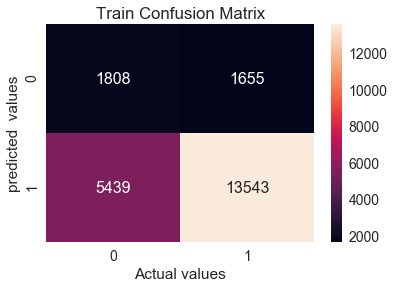

In [115]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)),
                                   range(2),range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(train_confusion_matrix , annot = True, annot_kws={"size":16}, fmt = 'd')# font size
plt.xlabel('Actual values')
plt.ylabel('predicted  values')
plt.title('Train Confusion Matrix')

In [116]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2498875367241191 for threshold 0.753
[[  867  1679]
 [ 2625 11329]]


the maximum value of tpr*(1-fpr) 0.2498875367241191 for threshold 0.753


Text(0.5,1,'Test Confusion Matrix')

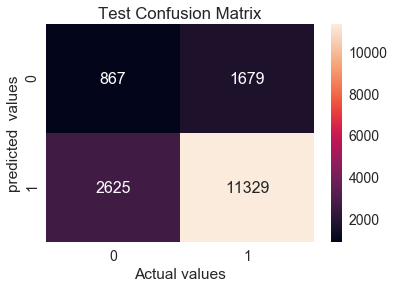

In [117]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)),
                                   range(2),range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(train_confusion_matrix , annot = True, annot_kws={"size":16}, fmt = 'd')# font size
plt.xlabel('Actual values')
plt.ylabel('predicted  values')
plt.title('Test Confusion Matrix')

# Summary

In [118]:
# all categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW) combined in X_train,X_cv and X_test
#plot the graph of Train AUC points and CV AUC points using simple loop methode
#choose the best k where disttance between Train AUC points and CV AUC points is less and it should not underfit ot overfit
# with best_k=81 ,got the accuracy 0.68

<h2>2.5 Feature selection with `SelectKBest` </h2>

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [119]:
# Please write all the code with proper documentation

In [120]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train2=hstack(((train_categories_one_hot,train_subcategories_one_hot,train_state_one_hot,train_grade_one_hot,
                 train_teacher_prefix_one_hot,train_price_standar,train_quantity_standar,
                  teacher_number_of_previously_posted_projects_train
                ,avg_w2v_essay_train_data,avg_w2v_project_title_train_data))).tocsr()
X_train2.shape

(22445, 703)

In [121]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_cv2=hstack(((cv_categories_one_hot,cv_subcategories_one_hot,cv_state_one_hot,cv_grade_one_hot, cv_teacher_prefix_one_hot
               ,cv_price_standar,cv_quantity_standar,teacher_number_of_previously_posted_projects_cv,
               avg_w2v_essay_cv_data,avg_w2v_project_title_cv_data))).tocsr()
X_cv2.shape

(11055, 703)

In [122]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_test2=hstack(((test_categories_one_hot,test_subcategories_one_hot,test_state_one_hot,test_grade_one_hot,
                test_teacher_prefix_one_hot, test_price_standar,test_quantity_standar,teacher_number_of_previously_posted_projects_test, 
                 avg_w2v_essay_test_data,avg_w2v_project_title_test_data))).tocsr()
X_test2.shape

(16500, 703)

In [123]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import f_classif, SelectKBest

X_train_2 = SelectKBest(f_classif, k=20).fit_transform(X_train2, y_train)
X_cv_2 = SelectKBest(f_classif, k=20).fit_transform(X_cv2, y_cv)
X_test_2 = SelectKBest(f_classif, k=20).fit_transform(X_test2, y_test)

C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 0 0 0 0 0 0 0 0] are constant.
  UserWarning)
C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 0 0 0 0 0 0 0 0] are constant.
  UserWarning)
C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 0 0 0 0 0 0 0 0] are constant.
  UserWarning)


In [124]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

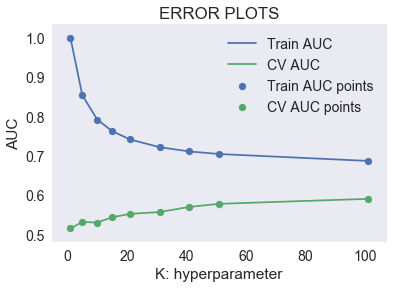

In [125]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_2, y_train)

    y_train_pred = batch_predict(neigh,X_train_2)    
    y_cv_pred = batch_predict(neigh,X_cv_2)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [126]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less
# Note: based on the method you use you might get different hyperparameter values as best one
# so, you choose according to the method you choose, you use gridsearch if you are having more computing power and note it will take more time
# if you increase the cv values in the GridSearchCV you will get more rebust results.

#here we are choosing the best_k based on forloop results
best_k = 93

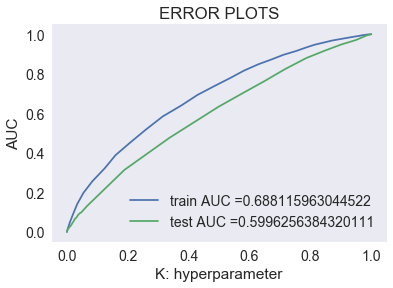

In [127]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh,X_train_2)    
y_test_pred = batch_predict(neigh, X_test_2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [128]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [129]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2498038544344324 for threshold 0.828
[[ 1780  1683]
 [ 4953 14029]]


the maximum value of tpr*(1-fpr) 0.2498038544344324 for threshold 0.828


Text(0.5,1,'Train Confusion Matrix')

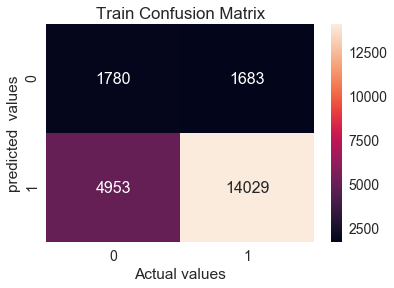

In [130]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)),
                                   range(2),range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(train_confusion_matrix , annot = True, annot_kws={"size":16}, fmt = 'd')# font size
plt.xlabel('Actual values')
plt.ylabel('predicted  values')
plt.title('Train Confusion Matrix')

In [131]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999444625798123 for threshold 0.817
[[1688  858]
 [7309 6645]]


the maximum value of tpr*(1-fpr) 0.24999444625798123 for threshold 0.817


Text(0.5,1,'Test Confusion Matrix')

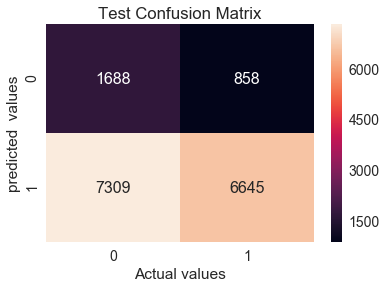

In [132]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)),
                                   range(2),range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(train_confusion_matrix , annot = True, annot_kws={"size":16}, fmt = 'd')# font size
plt.xlabel('Actual values')
plt.ylabel('predicted  values')
plt.title('Test Confusion Matrix')

In [133]:
# all categorical, numerical features + project_title(TFIDF)+ preprocessed_essay (TFIDF) combined in X_train,X_cv and X_test
#plot the graph of Train AUC points and CV AUC points using simple loop methode
#choose the best k where disttance between Train AUC points and CV AUC points is less and it should not underfit ot overfit
# with best_k=93,got the accuracy 0.68

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [ ]:
# Please write all the code with proper documentation

In [134]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train3=hstack(((train_categories_one_hot,train_subcategories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_prefix_one_hot,train_price_standar,train_quantity_standar,
                  teacher_number_of_previously_posted_projects_train,
                  tfidf_w2v_essay_train_data,tfidf_w2v_train_project_title))).tocsr()
X_train3.shape

(22445, 703)

In [135]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_cv3=hstack(((cv_categories_one_hot,cv_subcategories_one_hot,cv_state_one_hot,cv_grade_one_hot,cv_teacher_prefix_one_hot,
               cv_price_standar,cv_quantity_standar,teacher_number_of_previously_posted_projects_cv,
               tfidf_w2v_essay_cv_data,tfidf_w2v_cv_project_title))).tocsr()
X_cv3.shape

(11055, 703)

In [136]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_test3=hstack(((test_categories_one_hot,test_subcategories_one_hot,test_state_one_hot,test_grade_one_hot,test_teacher_prefix_one_hot,
                 test_price_standar,test_quantity_standar,teacher_number_of_previously_posted_projects_test,
                 tfidf_w2v_essay_test_data,tfidf_w2v_test_project_title))).tocsr()
X_test3.shape

(16500, 703)

In [137]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2,f_classif

X_train_3 = SelectKBest(f_classif, k=20).fit_transform(X_train3, y_train)

X_cv_3 = SelectKBest(f_classif, k=20).fit_transform(X_cv3, y_cv)

X_test_3= SelectKBest(f_classif, k=20).fit_transform(X_test3, y_test)

C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 0 0 0 0 0 0 0 0] are constant.
  UserWarning)
C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 0 0 0 0 0 0 0 0] are constant.
  UserWarning)
C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 0 0 0 0 0 0 0 0] are constant.
  UserWarning)


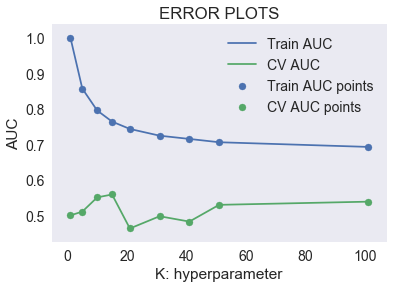

In [138]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_3, y_train)

    y_train_pred = batch_predict(neigh,X_train_3)    
    y_cv_pred = batch_predict(neigh,X_cv_3)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [139]:
#here we are choosing the best_k based on forloop results
best_k = 101

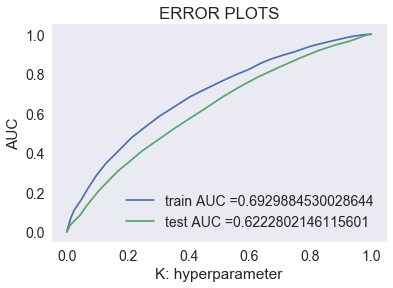

In [140]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_3, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh,X_train_3)    
y_test_pred = batch_predict(neigh, X_test_3)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [141]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [142]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24998480283587005 for threshold 0.822
[[ 1718  1745]
 [ 4571 14411]]


the maximum value of tpr*(1-fpr) 0.24998480283587005 for threshold 0.822


Text(0.5,1,'Train Confusion Matrix')

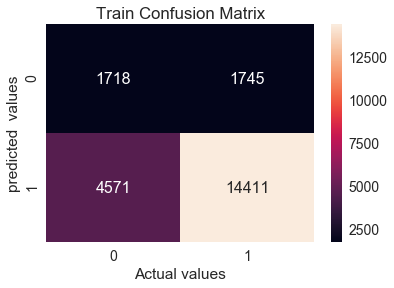

In [143]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)),
                                   range(2),range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(train_confusion_matrix , annot = True, annot_kws={"size":16}, fmt = 'd')# font size
plt.xlabel('Actual values')
plt.ylabel('predicted  values')
plt.title('Train Confusion Matrix')

In [144]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2498875367241191 for threshold 0.871
[[1648  898]
 [6653 7301]]


the maximum value of tpr*(1-fpr) 0.2498875367241191 for threshold 0.871


Text(0.5,1,'Test Confusion Matrix')

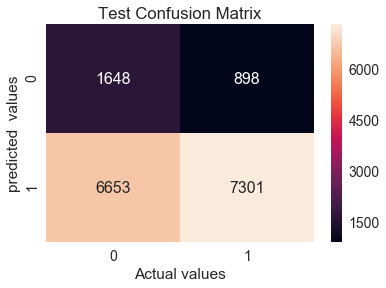

In [145]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)),
                                   range(2),range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(train_confusion_matrix , annot = True, annot_kws={"size":16}, fmt = 'd')# font size
plt.xlabel('Actual values')
plt.ylabel('predicted  values')
plt.title('Test Confusion Matrix')

In [146]:
# all categorical, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V) combined in X_train,X_cv and X_test
#plot the graph of Train AUC points and CV AUC points using simple loop methode
#choose the best k where disttance between Train AUC points and CV AUC points is less and it should not underfit ot overfit
# with best_k=101,got the accuracy 0.69

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [147]:
# Please write all the code with proper documentation

In [148]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train4=hstack(((train_categories_one_hot,train_subcategories_one_hot,train_state_one_hot,train_grade_one_hot,
                   train_teacher_prefix_one_hot,train_price_standar,train_quantity_standar,
                  teacher_number_of_previously_posted_projects_train,
                  tfidf_w2v_essay_train_data,tfidf_w2v_train_project_title))).tocsr()
X_train4.shape

(22445, 703)

In [149]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_cv4=hstack(((cv_categories_one_hot,cv_subcategories_one_hot,cv_state_one_hot,cv_grade_one_hot,
               cv_teacher_prefix_one_hot,cv_price_standar,cv_quantity_standar,
                  teacher_number_of_previously_posted_projects_cv,
               tfidf_w2v_essay_cv_data,tfidf_w2v_cv_project_title))).tocsr()
X_cv4.shape

(11055, 703)

In [150]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_test4=hstack(((test_categories_one_hot,test_subcategories_one_hot,test_state_one_hot,test_grade_one_hot,
                 test_teacher_prefix_one_hot,test_price_standar,test_quantity_standar,
                  teacher_number_of_previously_posted_projects_test,
                 tfidf_w2v_essay_test_data,tfidf_w2v_test_project_title))).tocsr()
X_test4.shape

(16500, 703)

In [151]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2,f_classif

X_train4 = SelectKBest(f_classif, k=20).fit_transform(X_train4, y_train)

X_cv4 = SelectKBest(f_classif, k=20).fit_transform(X_cv4, y_cv)

X_test4= SelectKBest(f_classif, k=20).fit_transform(X_test4, y_test)

C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 0 0 0 0 0 0 0 0] are constant.
  UserWarning)
C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 0 0 0 0 0 0 0 0] are constant.
  UserWarning)
C:\Users\mayuk\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [0 0 0 0 0 0 0 0 0] are constant.
  UserWarning)


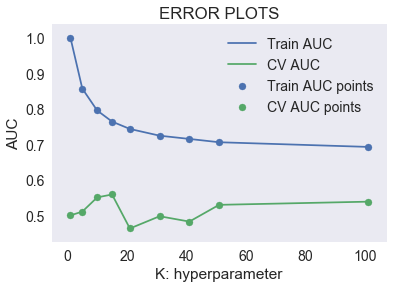

In [152]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train4, y_train)

    y_train_pred = batch_predict(neigh,X_train4)    
    y_cv_pred = batch_predict(neigh,X_cv4 )

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [153]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less
# Note: based on the method you use you might get different hyperparameter values as best one
# so, you choose according to the method you choose, you use gridsearch if you are having more computing power and note it will take more time
# if you increase the cv values in the GridSearchCV you will get more rebust results.

#here we are choosing the best_k based on forloop results
best_k =83

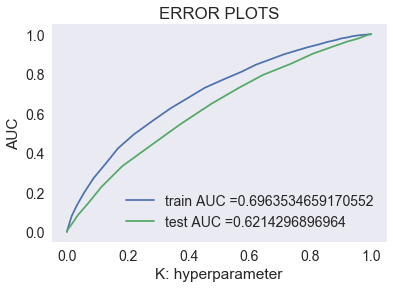

In [154]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train4, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh,X_train4)    
y_test_pred = batch_predict(neigh, X_test4)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [155]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24965309189535445 for threshold 0.819
[[ 1667  1796]
 [ 4287 14695]]


the maximum value of tpr*(1-fpr) 0.24965309189535445 for threshold 0.819


Text(0.5,1,'Train Confusion Matrix')

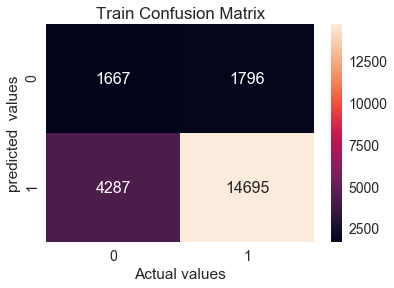

In [156]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)),
                                   range(2),range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(train_confusion_matrix , annot = True, annot_kws={"size":16}, fmt = 'd')# font size
plt.xlabel('Actual values')
plt.ylabel('predicted  values')
plt.title('Train Confusion Matrix')

In [157]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24936810757474873 for threshold 0.88
[[1856  690]
 [7922 6032]]


the maximum value of tpr*(1-fpr) 0.24936810757474873 for threshold 0.88


Text(0.5,1,'Test Confusion Matrix')

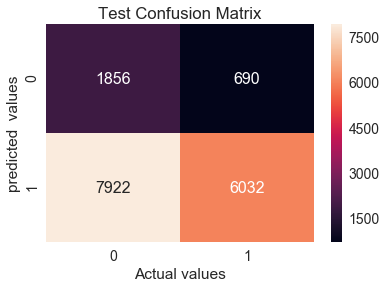

In [158]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)),
                                   range(2),range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(train_confusion_matrix , annot = True, annot_kws={"size":16}, fmt = 'd')# font size
plt.xlabel('Actual values')
plt.ylabel('predicted  values')
plt.title('Test Confusion Matrix')

In [159]:
# all categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V) combined in X_train,X_cv and X_test
#plot the graph of Train AUC points and CV AUC points using simple loop methode
#choose the best k where disttance between Train AUC points and CV AUC points is less and it should not underfit ot overfit
# with best_k=83,got the accuracy 0.70

<h1>3. Conclusions</h1>

In [160]:
# Please compare all your models using Prettytable library

In [161]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer","Model","Hyper Parameter","AUC"]
x.add_row(["BOW","Auto","81","0.68"])
x.add_row(["TFIDF","Auto","93","0.69"])
x.add_row(["W2V","Auto","101","0.69"])
x.add_row(["TFIDFW2V","Auto", "83","0.70"])

print(x)

+------------+-------+-----------------+------+
| Vectorizer | Model | Hyper Parameter | AUC  |
+------------+-------+-----------------+------+
|    BOW     |  Auto |        81       | 0.68 |
|   TFIDF    |  Auto |        93       | 0.69 |
|    W2V     |  Auto |       101       | 0.69 |
|  TFIDFW2V  |  Auto |        83       | 0.70 |
+------------+-------+-----------------+------+
